In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [4]:
data=load_breast_cancer()

In [10]:
X=data.data
Y=data.target

In [13]:
LR_=LogisticRegression(solver="liblinear",C=0.8,random_state=420)
cross_val_score(LR_,X,Y,cv=10).mean()

0.9508145363408522

In [17]:
X_embedded=SelectFromModel(LR_,norm_order=1).fit_transform(X,Y)
X_embedded.shape

(569, 9)

In [18]:
cross_val_score(LR_,X_embedded,Y,cv=10).mean()

0.9368107769423559

调节SelectFromModel这个类中的参数threshold，这是嵌入法的阈值，表示删除所有参数的绝对值低于这个阈
值的特征。现在threshold默认为None，所以SelectFromModel只根据L1正则化的结果来选择了特征，即选择了所
有L1正则化后参数不为0的特征。我们此时，只要调整threshold的值（画出threshold的学习曲线），就可以观察
不同的threshold下模型的效果如何变化。一旦调整threshold，就不是在使用L1正则化选择特征，而是使用模型的
属性.coef_中生成的各个特征的系数来选择。coef_虽然返回的是特征的系数，但是系数的大小和决策树中的
feature_ importances_以及降维算法中的可解释性方差explained_vairance_概念相似，其实都是衡量特征的重要
程度和贡献度的，因此SelectFromModel中的参数threshold可以设置为coef_的阈值，即可以剔除系数小于
threshold中输入的数字的所有特征。

In [21]:
abs(LR_.fit(X,Y).coef_.max())

1.9575345804035076

In [40]:
fullx=[]
fsx=[]
k=0
threshold=np.linspace(0,abs(LR_.fit(X,Y).coef_).max(),20)
for i in threshold:
    X_embeded=SelectFromModel(LR_,threshold=i).fit_transform(X,Y)
    fullx.append(cross_val_score(LR_,X,Y,cv=5).mean())
    fsx.append(cross_val_score(LR_,X,Y,cv=5).mean())
    print(threshold[k],X_embedded,X_embedded.shape[1])
    k+=1
plt.fihure(figsize=(20,5))

0.0 [[17.99     0.2776   0.3001  ...  0.7119   0.2654   0.4601 ]
 [20.57     0.07864  0.0869  ...  0.2416   0.186    0.275  ]
 [19.69     0.1599   0.1974  ...  0.4504   0.243    0.3613 ]
 ...
 [16.6      0.1023   0.09251 ...  0.3403   0.1418   0.2218 ]
 [20.6      0.277    0.3514  ...  0.9387   0.265    0.4087 ]
 [ 7.76     0.04362  0.      ...  0.       0.       0.2871 ]] 9
0.10302813581071092 [[17.99     0.2776   0.3001  ...  0.7119   0.2654   0.4601 ]
 [20.57     0.07864  0.0869  ...  0.2416   0.186    0.275  ]
 [19.69     0.1599   0.1974  ...  0.4504   0.243    0.3613 ]
 ...
 [16.6      0.1023   0.09251 ...  0.3403   0.1418   0.2218 ]
 [20.6      0.277    0.3514  ...  0.9387   0.265    0.4087 ]
 [ 7.76     0.04362  0.      ...  0.       0.       0.2871 ]] 9
0.20605627162142184 [[17.99     0.2776   0.3001  ...  0.7119   0.2654   0.4601 ]
 [20.57     0.07864  0.0869  ...  0.2416   0.186    0.275  ]
 [19.69     0.1599   0.1974  ...  0.4504   0.243    0.3613 ]
 ...
 [16.6      0.1023  

AttributeError: module 'matplotlib.pyplot' has no attribute 'fihure'

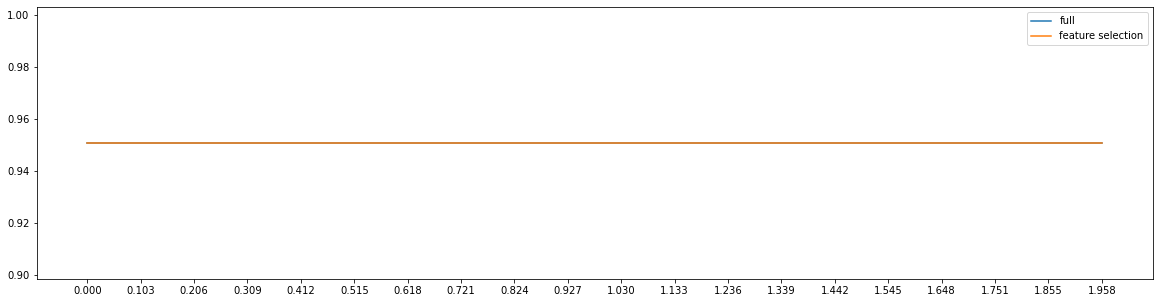

In [41]:
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

0.9561090225563911 7.51


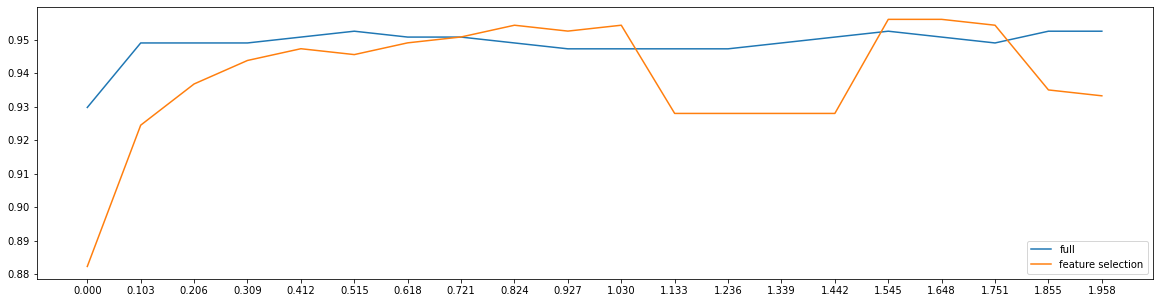

In [46]:
#第二种方法：通过调整逻辑回归中，损失函数前面的系数，评价参数C的学习曲线
C=np.arange(0.01,10.01,0.5)
fullx=[]
fsx=[]
for i in C:
    LR_=LogisticRegression(C=i,solver="liblinear")
    X_embedded=SelectFromModel(LR_,norm_order=10.01).fit_transform(X,Y)
    fullx.append(cross_val_score(LR_,X,Y,cv=10).mean())
    fsx.append(cross_val_score(LR_,X_embedded,Y,cv=10).mean())
print(max(fsx),C[fsx.index(max(fsx))])
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

0.9561090225563911 6.05


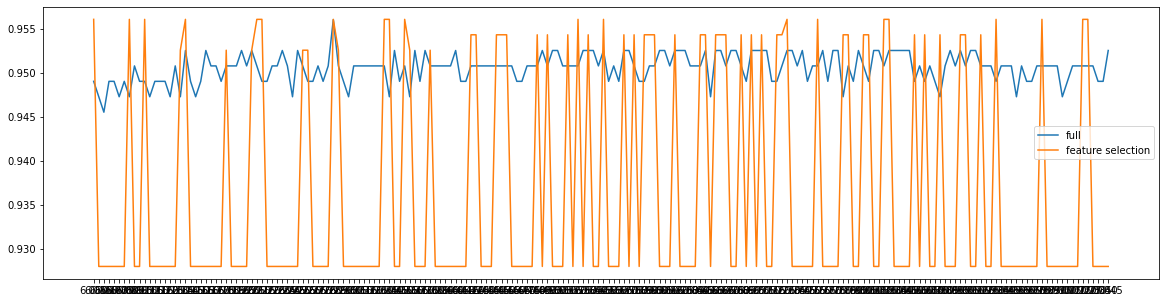

In [49]:
C=np.arange(6.05,7.05,0.005)
fullx=[]
fsx=[]
for i in C:
    LR_=LogisticRegression(C=i,solver="liblinear")
    X_embedded=SelectFromModel(LR_,norm_order=1).fit_transform(X,Y)
    fullx.append(cross_val_score(LR_,X,Y,cv=10).mean())
    fsx.append(cross_val_score(LR_,X_embedded,Y,cv=10).mean()) 
print(max(fsx),C[fsx.index(max(fsx))])
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

In [50]:
#验证模型的结果，在降维之前。
LR_=LogisticRegression(solver="liblinear",C=6.05,random_state=420)
cross_val_score(LR_,X,Y,cv=10).mean()

0.9490601503759398

In [51]:
#验证模型的结果，在降维之后
LR_=LogisticRegression(solver="liblinear",C=6.05,random_state=420)
X_embedded=SelectFromModel(LR_,norm_order=1).fit_transform(X,Y)
X_embedded.shape

(569, 11)

In [52]:
cross_val_score(LR_,X_embedded,Y,cv=10).mean()

0.9561090225563911